In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset from a CSV file

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Datasets/PipleLines/vehicle_emissions.csv')

In [3]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


# Separate features (X) and target variable (y)

In [30]:
X = df.drop('CO2_Emissions',axis=1)
y=df['CO2_Emissions']

In [31]:
X

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,7
...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,5


In [6]:
y

,CO2_Emissions
0,199
1,256
2,232
3,242
4,230
...,...
930,219
931,230
932,240
933,236


# Define numerical and categorical columns

In [68]:
numerical_cols = ['Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)',
                  'Fuel_Consumption_in_City_Hwy(L/100 km)', 'Fuel_Consumption_comb(L/100km)']
categorical_cols = ['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Smog_Level']

In [56]:
# prompt: get the indexes of all the numeric columns as well as categorical cols

numerical_cols =X.select_dtypes(include=['object']).columns
categorical_cols = X.select_dtypes(include=np.number).columns

print("Categorical column indexes:")
numerical_cols_arr = []
for col in categorical_cols:
  numerical_cols_arr.append(X.columns.get_loc(col))
  print(X.columns.get_loc(col))

print("\nNumerical column indexes:")
categorical_cols_arr=[]
for col in numerical_cols:
  categorical_cols_arr.append(X.columns.get_loc(col))
  print(X.columns.get_loc(col))

numerical_cols_arr , categorical_cols_arr


Categorical column indexes:
0
4
5
7
8
9
10

Numerical column indexes:
1
2
3
6


([0, 4, 5, 7, 8, 9, 10], [1, 2, 3, 6])

# Pipeline for preprocessing numerical data

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Pipeline for preprocessing numerical data

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for preprocessing categorical data

In [58]:
# Pipeline for preprocessing categorical data
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


# Combine both pipelines using ColumnTransformer

In [59]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols_arr),
    ('cat', categorical_pipeline, categorical_cols_arr)
])

# Final pipeline that includes preprocessing and the machine learning model

In [60]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())  # Default parameters are used; can be tuned for better performance
])

# Split dataset into training and testing sets

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),Smog_Level
408,2021,GMC,Terrain AWD,SUV: Small,1.5,4,A9,9.6,8.3,9.0,7
5,2021,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,11.3,8.1,9.8,7
54,2021,Audi,SQ5 Sportback quattro,SUV: Small,3.0,6,AS8,13.1,9.9,11.6,5
275,2021,Ford,Bronco Black Diamond 4WD,SUV: Small,2.3,4,AS10,13.1,13.1,13.1,5
868,2021,Toyota,Camry AWD XLE/XSE,Mid-size,2.5,4,AS8,9.5,7.0,8.4,6
...,...,...,...,...,...,...,...,...,...,...,...
106,2021,BMW,X3 M40i,SUV: Small,3.0,6,AS8,11.3,8.7,10.1,5
270,2021,Ford,Bronco 4WD,SUV: Small,2.3,4,M7,11.6,10.9,11.3,5
860,2021,Toyota,Avalon AWD,Mid-size,2.5,4,AS8,9.5,7.0,8.4,6
435,2021,Honda,Civic Sedan,Mid-size,2.0,4,AV7,8.2,6.5,7.4,3


# Train the model

In [62]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4, 5, 7, 8, 9, 10]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2, 3, 6])])),
                ('model', RandomForestRegressor())])

# Model Prediction

In [63]:
y_pred = pipeline.predict(X_test)

In [64]:
y_pred

array([308.77, 224.47, 306.95, 511.42, 205.79, 323.01, 113.68, 214.78,
       108.35, 221.17, 206.05, 288.97, 324.96, 206.13, 220.33, 252.88,
       215.04, 241.51, 278.09, 249.67, 324.15, 229.66, 237.2 , 219.23,
       232.22, 255.39, 219.93, 194.32, 321.56, 366.87, 277.65, 321.23,
       328.38, 269.33, 343.75, 215.73, 300.56, 237.02, 205.79, 322.35,
       288.37, 262.18, 158.46, 123.8 , 278.  , 288.38, 210.01, 281.55,
       178.41, 348.19, 244.07, 346.29, 212.93, 277.15, 205.31, 137.96,
       114.14, 214.12, 264.77, 236.7 , 213.17, 157.22, 215.07, 210.21,
       232.8 , 383.16, 192.48, 356.93, 258.54, 178.61, 241.33, 169.13,
       265.2 , 287.52, 277.7 , 194.17, 251.22, 318.84, 275.17, 136.78,
       201.36, 184.04, 261.71, 328.3 , 291.76, 273.37, 273.88, 284.72,
       157.99, 197.09, 214.6 , 324.81, 165.3 , 385.89, 173.24, 219.47,
       288.95, 197.02, 348.33, 286.63, 285.76, 283.38, 370.44, 323.87,
       166.56, 217.07, 370.15, 189.38, 399.13, 244.98, 189.54, 226.84,
      

# Model Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [73]:
print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")  # Higher is better; 1.0 indicates perfect prediction
print(f"Root Mean Squared Error: {rmse:.2f}")  # Lower is better
print(f"Mean Absolute Error: {mae:.2f}")  # Lower is better


Model Performance Metrics:
R² Score: 0.9751
Root Mean Squared Error: 10.01
Mean Absolute Error: 3.13


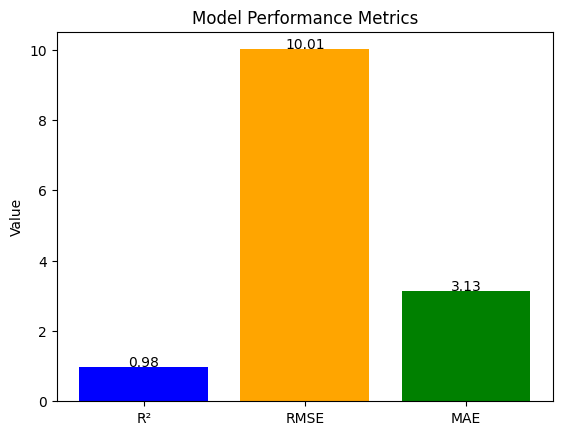

In [75]:
metrics = ['R²', 'RMSE', 'MAE']
values = [r2, rmse, mae]

plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title('Model Performance Metrics')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()


# Saving the model

In [76]:
# prompt: pickle file

import pickle

# # Saving the model
filename = 'Detect_Vehicle_Carbon_Emissions_Using_Pipeline.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

# Visualization of the predictions

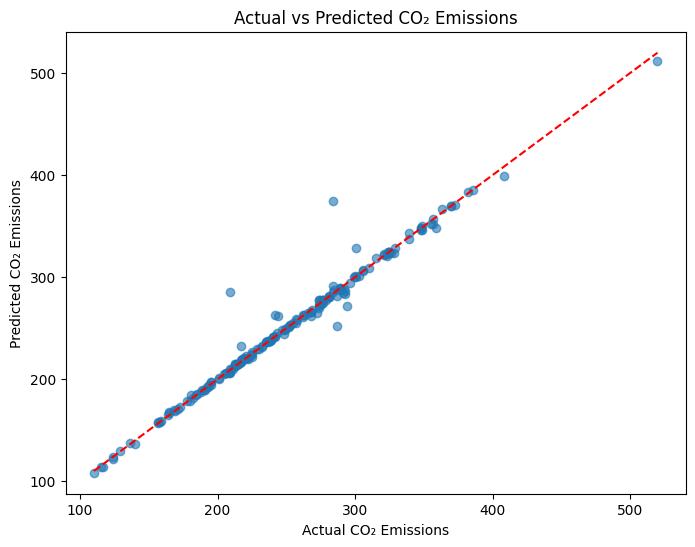

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted CO₂ Emissions')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.show()


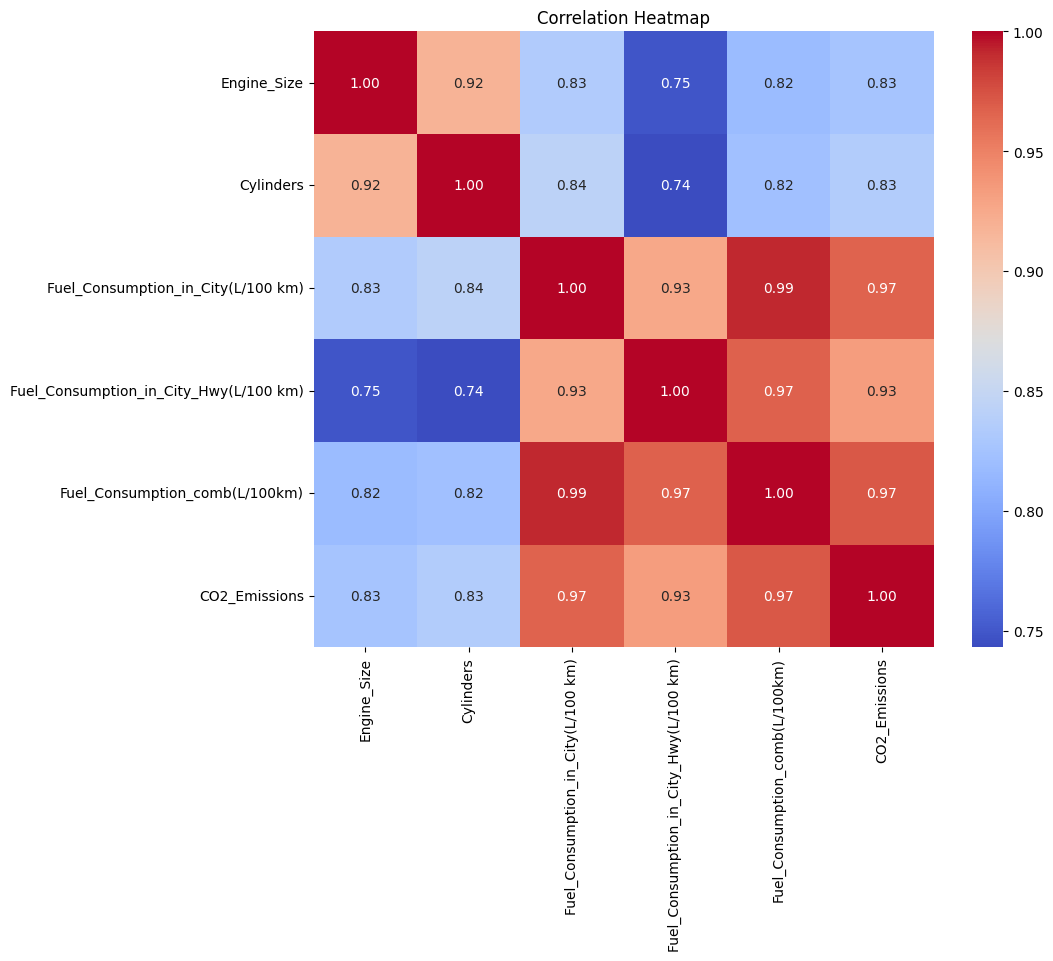

In [70]:
corr_matrix = df[numerical_cols + ['CO2_Emissions']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()